In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
class ItemClassifier(nn.Module):
    def __init__(self, in_features=3, h1=8, h2=9, out_features=9):
      super().__init__()
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)


    def forward(self, x):
        x =  F.relu(self.fc1(x))
        x =  F.relu(self.fc2(x))
        x = self.out(x)

        return x

torch.manual_seed(30) # for randomization. the argument could be anything


In [18]:
df = pd.read_csv('./data/receipt_items.csv')
df.head()

,item_name,quantity,unitprice,cost,category
0,BANANAS,0.41,0.49,0.20,produce
1,FRAP,1.00,5.48,5.48,beverages
2,R-CARROTS SHREDDED 10 OZ,1.00,1.29,1.29,produce
3,R-CUCUMBERS PERSIAN 1 LB,1.00,1.99,1.99,produce
4,TOMATOES CRUSHED NO SALT,1.00,1.59,1.59,produce


In [14]:
c
categories.__len__()

9

In [19]:
df["category"] = df["category"].apply(lambda x: categories.index(x))
df.tail()

,item_name,quantity,unitprice,cost,category
111,DM PNAPL CHNKY,2.0,0.98,1.96,8
112,SUNBEAN BUNS,1.0,1.98,1.98,6
113,WINCO SANDWICH WT,1.0,2.58,2.58,6
114,WINCO HOMO MILK,1.0,3.58,3.58,1
115,EGGS,1.0,2.28,2.28,1


In [23]:
X = df.drop(["item_name","category"], axis=1).values
y = df["category"].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_test)
y_train, y_test = torch.LongTensor(y_train), torch.LongTensor(y_test)

In [41]:
classifier = ItemClassifier(out_features=len(categories))
learning_rate = 0.07
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

epochs = 1000
losses = []

for i in range(epochs):
    # get a prediction
    y_pred = classifier.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy()) # later on, we're gonna take these losses and graph them out
    if i % 10 == 0:
      print(f"Epoch: {i} and loss: {loss}")

    # Do some propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 800.3836669921875
Epoch: 10 and loss: 2.782698631286621
Epoch: 20 and loss: 1.9660398960113525
Epoch: 30 and loss: 1.94382905960083
Epoch: 40 and loss: 1.923072099685669
Epoch: 50 and loss: 1.9024885892868042
Epoch: 60 and loss: 1.878667950630188
Epoch: 70 and loss: 1.854138970375061
Epoch: 80 and loss: 1.8293174505233765
Epoch: 90 and loss: 1.8067219257354736
Epoch: 100 and loss: 1.7874120473861694
Epoch: 110 and loss: 1.7725101709365845
Epoch: 120 and loss: 1.7611674070358276
Epoch: 130 and loss: 1.7513995170593262
Epoch: 140 and loss: 1.7434159517288208
Epoch: 150 and loss: 1.7385016679763794
Epoch: 160 and loss: 1.7293083667755127
Epoch: 170 and loss: 1.7232420444488525
Epoch: 180 and loss: 1.7193939685821533
Epoch: 190 and loss: 1.715585470199585
Epoch: 200 and loss: 1.7132627964019775
Epoch: 210 and loss: 1.7099783420562744
Epoch: 220 and loss: 1.7074835300445557
Epoch: 230 and loss: 1.707024097442627
Epoch: 240 and loss: 1.7042956352233887
Epoch: 250 and loss:

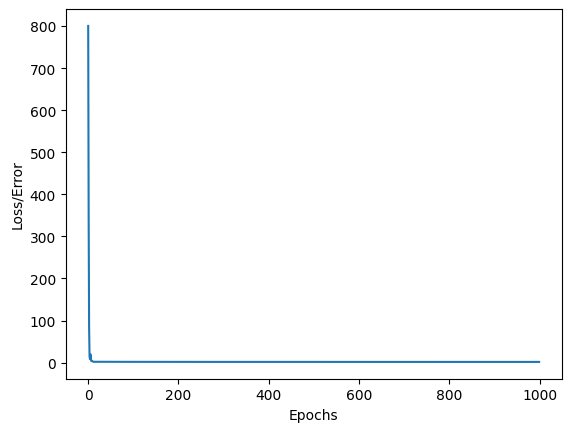

In [42]:
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss/Error")
plt.show()

MODEL VALIDATAION

In [43]:
with torch.no_grad(): # turn off back propagation
  y_eval = classifier.forward(X_test)
  loss = criterion(y_eval, y_test)


correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = classifier.forward(data)
    #y_val_list = y_val.tolist()
    #predicted = y_val_list.index(max(y_val_list))

    if y_val.argmax().item() == y_test[i]:
      correct +=1

    print(f"Count: {i + 1} and Predicted: {y_val.argmax().item()} \t Actual: {y_test[i]}")

print(correct)

Count: 1 and Predicted: 8 	 Actual: 0
Count: 2 and Predicted: 8 	 Actual: 2
Count: 3 and Predicted: 5 	 Actual: 0
Count: 4 and Predicted: 8 	 Actual: 0
Count: 5 and Predicted: 0 	 Actual: 1
Count: 6 and Predicted: 5 	 Actual: 4
Count: 7 and Predicted: 5 	 Actual: 2
Count: 8 and Predicted: 8 	 Actual: 0
Count: 9 and Predicted: 8 	 Actual: 7
Count: 10 and Predicted: 0 	 Actual: 5
Count: 11 and Predicted: 0 	 Actual: 6
Count: 12 and Predicted: 8 	 Actual: 5
Count: 13 and Predicted: 8 	 Actual: 5
Count: 14 and Predicted: 0 	 Actual: 1
Count: 15 and Predicted: 5 	 Actual: 5
Count: 16 and Predicted: 0 	 Actual: 0
Count: 17 and Predicted: 0 	 Actual: 0
Count: 18 and Predicted: 8 	 Actual: 8
Count: 19 and Predicted: 8 	 Actual: 8
Count: 20 and Predicted: 8 	 Actual: 0
Count: 21 and Predicted: 8 	 Actual: 4
Count: 22 and Predicted: 0 	 Actual: 0
Count: 23 and Predicted: 8 	 Actual: 2
Count: 24 and Predicted: 0 	 Actual: 7
6
